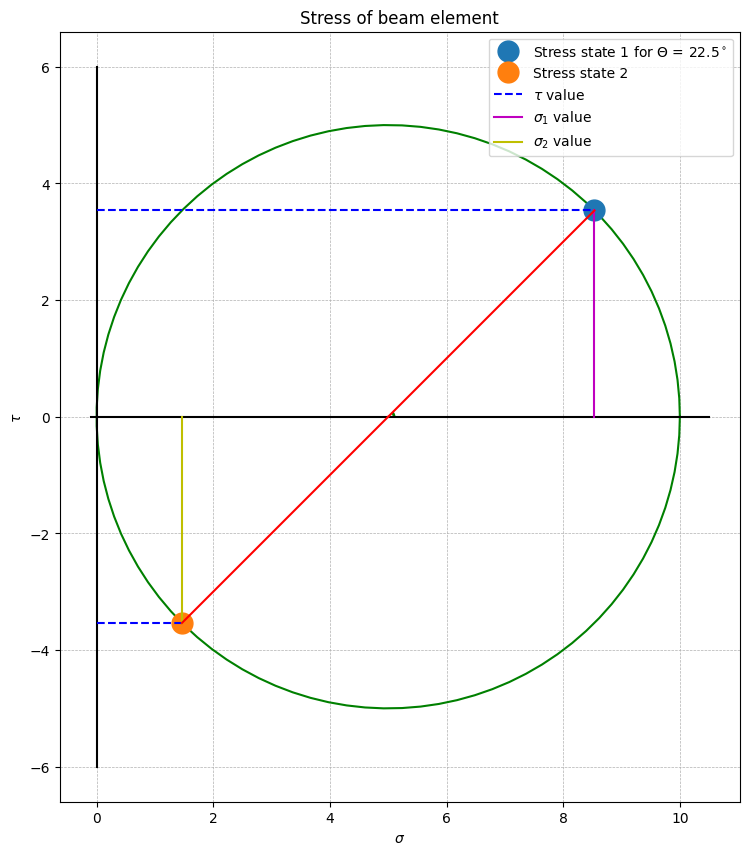

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


sigma_x = 10  # Replace with the actual value
tau = 0
sigma_y = 0

# Center and radius of Mohr's Circle
center = (sigma_x + sigma_y) / 2
radius = np.sqrt(((sigma_x - sigma_y) / 2) ** 2 + tau ** 2)

# Generate points for Mohr's Circle
theta = np.linspace(0, 2 * np.pi, 100)
x = center + radius * np.cos(theta)
y = radius * np.sin(theta)

x_0=np.zeros_like(x)
x_1=np.linspace(-radius*1.2,radius*1.2,100)
x_2=np.linspace(-0.1,radius*2.1,100)


plt.figure(figsize=(10,10))
plt.plot(x, y,'g')
plt.plot(x_0,x_1,'k-')
plt.plot(x_2,x_0,'k-')


theta_1=np.pi/4
line_x = radius * np.cos(theta_1)
line_y = radius * np.sin(theta_1)

plt.plot(radius + line_x, line_y, 'o',markersize=15, label=f'Stress state 1 for $\Theta$ = {round(np.degrees(theta_1/2), 1)}$^\circ$')

plt.plot(radius-line_x,-line_y,'o',markersize=15,label='Stress state 2')


plt.plot([0, radius+line_x], [line_y, line_y],'b--',label=r'$\tau$ value')
plt.plot([radius+line_x, radius+line_x], [0, line_y],'m-',label=r'$\sigma_1$ value')

plt.plot([0, radius-line_x], [-line_y, -line_y],'b--')
plt.plot([radius-line_x, radius-line_x], [0, -line_y],'y-',label=r'$\sigma_2$ value')


plt.plot([radius, radius+line_x], [0, line_y], 'r-')  # Plot the line
plt.plot([radius, radius-line_x], [0, -line_y], 'r-')  # Plot the line

plt.title('Stress of beam element')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\tau$')
plt.legend()

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Angle Arc
angle_arc = patches.Arc((radius, 0), 0.2, 0.2, angle=0, theta1=0, theta2=theta_1*180/np.pi, edgecolor='green', lw=2)
ax.add_patch(angle_arc)

plt.show()